In [15]:
import csv
import numpy as np
import matplotlib.pyplot as plt

filename = './befkbhalderstatkode.csv'

data = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}


def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = data[mask & (data[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() 
    return sum_of_people

year_mask = (data[:,0] == 2015)

## years(npArray) indholder list af (for hver n (bydel) sum antal personer hvor årstal er lig 2015 (mask))
years = np.array([number_of_people_per_neighbourhood(n, year_mask) for n in neighb.keys()])
years.sort()



<BarContainer object of 11 artists>

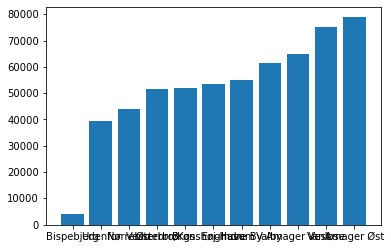

In [14]:
plt.bar(list(set(neighb.values())), years)

In [49]:
age_mask = (data[:,2] > 65) & (data[:,0] == 2015)
age_mask
old_people = data[age_mask]
old_people
sum_of_old_people = old_people[:,4].sum()
sum_of_old_people

55750

In [54]:
dansk_age_mask = (data[:,2] > 65) & (data[:,0] == 2015) & (data[:,3] != 5100)
danish_people = data[dansk_age_mask]
danish_people
sum_of_old_danish_people = danish_people[:,4].sum()
sum_of_old_danish_people

3451

[62221 62583 63050 63572 64503 65856 66148 66295 66673 66877 67020 67550
 67516 67671 67351 67330 67964 68769 69951 70938 72400 73388 74521 75113]
[47854 47589 47538 47633 47734 48275 49109 49520 50312 50756 51039 51045
 50869 50643 50303 50964 51466 53351 55315 57150 58411 59211 60328 61623]


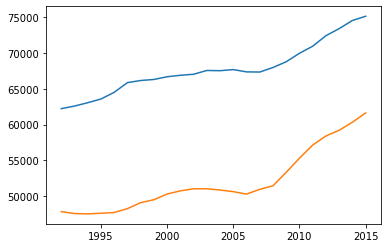

In [76]:
unique_years = np.unique(data[:,0])
vesterbro = (data[:,1] == 4)
østerbro = (data[:,1] == 2)

def number_of_people_per_neighbourhood_given_year(n, mask):
    all_people_in_given_n = data[mask & (data[:,0] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() 
    return sum_of_people

vesterbroSum = np.array([number_of_people_per_neighbourhood_given_year(n, vesterbro) for n in unique_years])
vesterbroSum
østerbroSum = np.array([number_of_people_per_neighbourhood_given_year(n, østerbro) for n in unique_years])
print(østerbroSum)
print(vesterbroSum)

plt.plot(unique_years, østerbroSum)
plt.plot(unique_years, vesterbroSum)